In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
import warnings 
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('bike.csv',parse_dates=['date'])
data

,instant,date,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-02-01,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-03-01,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-04-01,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-05-01,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,2012-12-28,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,2012-12-29,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,2012-12-30,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


In [3]:
data.dtypes

instant                int64
date          datetime64[ns]
season                 int64
yr                     int64
mnth                   int64
holiday                int64
weekday                int64
workingday             int64
weathersit             int64
temp                 float64
atemp                float64
hum                  float64
windspeed            float64
casual                 int64
registered             int64
cnt                    int64
dtype: object

In [4]:
data['yr'].drop_duplicates()

0      0
365    1
Name: yr, dtype: int64

In [5]:

data.drop('date',axis=1,inplace=True)
data

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247,1867,2114
727,728,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644,2451,3095
728,729,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159,1182,1341
729,730,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364,1432,1796


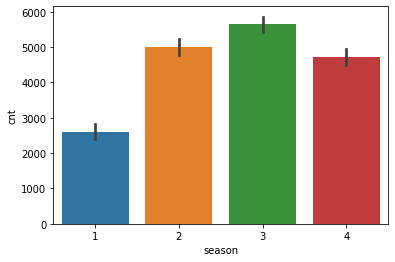

In [6]:
sns.barplot(x='season',y='cnt',data=data);

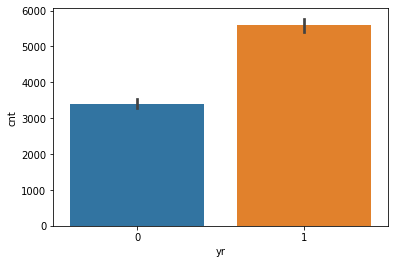

In [7]:
sns.barplot(x='yr',y='cnt',data=data);

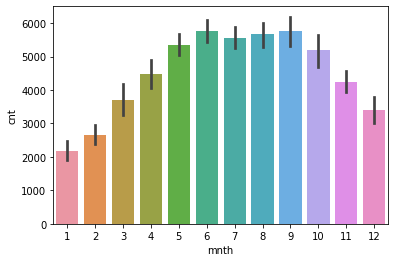

In [8]:
sns.barplot(x='mnth',y='cnt',data=data);

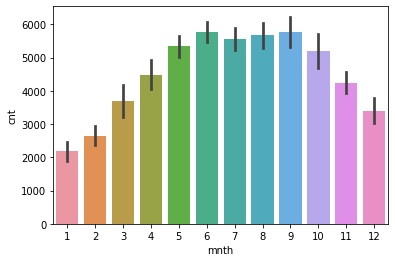

In [9]:
sns.barplot(x='mnth',y='cnt',data=data);

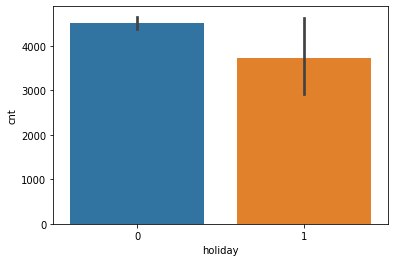

In [10]:
sns.barplot(x='holiday',y='cnt',data=data);

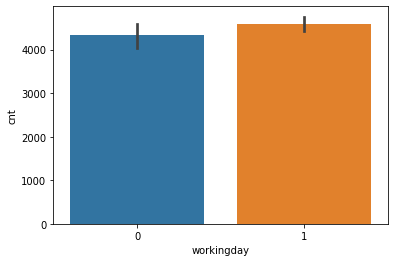

In [11]:
sns.barplot(x='workingday',y='cnt',data=data);

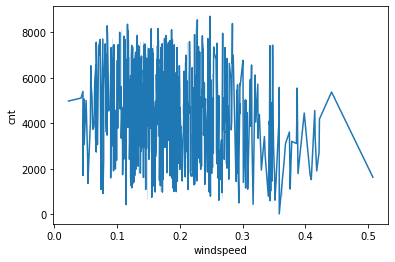

In [12]:
sns.lineplot(x='windspeed',y='cnt',data=data);

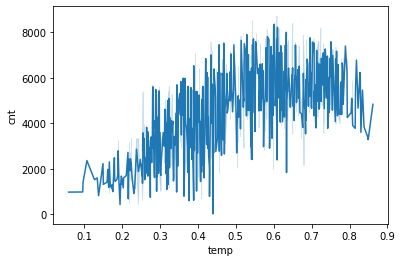

In [13]:
sns.lineplot(x='temp',y='cnt',data=data);

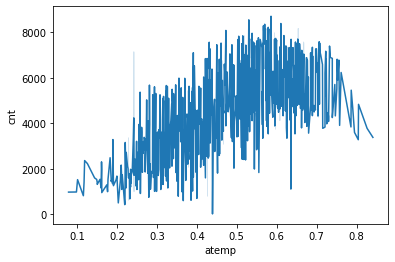

In [14]:
sns.lineplot(x='atemp',y='cnt',data=data);

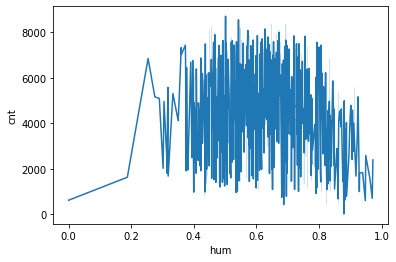

In [15]:
sns.lineplot(x='hum',y='cnt',data=data);

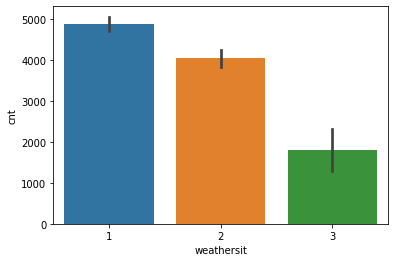

In [16]:
sns.barplot(x='weathersit',y='cnt',data=data);

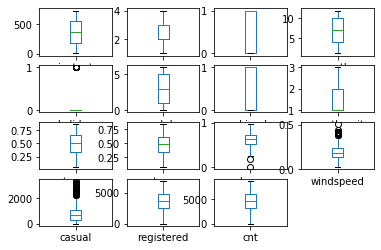

In [17]:
data.plot(kind='box',subplots=True,layout=(4,4));

In [18]:
from scipy.stats import zscore
z_score=abs(zscore(data))
print(data.shape)
data_final=data.loc[(z_score<3).all(axis=1)]
print(data_final.shape)

(731, 15)
(700, 15)


In [19]:
data=data_final
data.shape

(700, 15)

In [20]:
data.skew()

instant       0.014307
season       -0.014917
yr            0.017180
mnth         -0.013480
holiday       0.000000
weekday      -0.018876
workingday   -0.935263
weathersit    0.933362
temp         -0.056952
atemp        -0.131745
hum           0.074956
windspeed     0.633474
casual        1.144156
registered    0.056654
cnt          -0.051049
dtype: float64

In [21]:
for col in data.columns:
    if data.skew().loc[col]>0.55:
        data[col]=np.sqrt(data[col])

In [22]:
data.skew()

instant       0.014307
season       -0.014917
yr            0.017180
mnth         -0.013480
holiday       0.000000
weekday      -0.018876
workingday   -0.935263
weathersit    0.771078
temp         -0.056952
atemp        -0.131745
hum           0.074956
windspeed     0.094167
casual        0.273819
registered    0.056654
cnt          -0.051049
dtype: float64

In [23]:
df_x=data.drop('cnt',axis=1)
y=data['cnt']
df_x.shape,y.shape

((700, 14), (700,))

In [24]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(df_x)
x=pd.DataFrame(x,columns=df_x.columns)
x

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered
0,-1.722123,-1.362141,-0.991465,-1.607476,0.0,1.500812,-1.570142,1.151874,-0.826938,-0.680991,1.250794,-0.294559,-0.731029,-1.952504
1,-1.717385,-1.362141,-0.991465,-1.607476,0.0,-1.505106,-1.570142,1.151874,-0.721575,-0.741611,0.466973,0.824446,-1.334320,-1.942192
2,-1.712648,-1.362141,-0.991465,-1.607476,0.0,-1.004119,0.636885,-0.746878,-1.633374,-1.749292,-1.381514,0.821811,-1.378224,-1.581893
3,-1.707911,-1.362141,-0.991465,-1.607476,0.0,-0.503133,0.636885,-0.746878,-1.613535,-1.609993,-0.287609,-0.296698,-1.428483,-1.436871
4,-1.703174,-1.362141,-0.991465,-1.607476,0.0,-0.002147,0.636885,-0.746878,-1.466454,-1.504844,-1.383771,0.068190,-1.548009,-1.395621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,1.717155,-1.362141,1.008608,1.590035,0.0,0.498839,0.636885,1.151874,-1.317992,-1.520958,0.158646,1.888674,-0.952499,-1.170676
696,1.721893,-1.362141,1.008608,1.590035,0.0,0.999825,0.636885,1.151874,-1.322542,-1.346788,-0.290716,-0.366041,-0.088768,-0.794264
697,1.726630,-1.362141,1.008608,1.590035,0.0,1.500812,-1.570142,1.151874,-1.322542,-1.424332,0.872861,-0.841356,-1.230253,-1.612186
698,1.731367,-1.362141,1.008608,1.590035,0.0,-1.505106,-1.570142,-0.746878,-1.308902,-1.489943,-1.052547,1.894665,-0.651872,-1.451051


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.metrics import r2_score

In [26]:
lr=LinearRegression()
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=121,test_size=.20)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)
print('mean squared error',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))

0.9964566526459816
mean squared error 14385.643793691419
mean absolute error 84.29309270592145


In [27]:
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

In [28]:
sv=SVR(kernel='linear')
sv.fit(x_train,y_train)
y_pred=sv.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)
print('mean squared error',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))

0.831691518798127
mean squared error 683315.9767081663
mean absolute error 670.6959178975576


In [29]:
knn=KNeighborsRegressor(n_neighbors=8)
knn.fit(x_train,y_train)
y_pred=knn.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)
print('mean squared error',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))

0.9221468812444603
mean squared error 316076.0497767857
mean absolute error 403.1517857142857


In [61]:
dt=DecisionTreeRegressor(random_state=145,max_depth=9)
dt.fit(x_train,y_train)
y_pred=dt.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)
print('mean squared error',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))

0.9825424707817407
mean squared error 70875.86165297455
mean absolute error 174.50022727272727


In [43]:
rf=RandomForestRegressor(n_estimators=121,random_state=126,max_depth=9)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)
print('mean squared error',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))

0.9970742406125521
mean squared error 11878.29703631576
mean absolute error 75.09596673002403


In [47]:
gb=GradientBoostingRegressor(random_state=121,learning_rate=0.1,max_depth=6,n_estimators=121)
gb.fit(x_train,y_train)
y_pred=gb.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)
print('mean squared error',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))

0.9970933258767779
mean squared error 11800.812729690113
mean absolute error 68.01823802844115


In [50]:
xg=XGBRegressor(learning_rate=0.1,max_depth=6,random_state=101,n_estimators=122)
xg.fit(x_train,y_train)
y_pred=xg.predict(x_test)
score=r2_score(y_test,y_pred)
print(score)
print('mean squared error',mean_squared_error(y_test,y_pred))
print('mean absolute error',mean_absolute_error(y_test,y_pred))

[15:37:36] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
0.9969123104722041
mean squared error 12535.717572822981
mean absolute error 72.9219757080078


In [62]:
from sklearn.externals import joblib
joblib.dump(gb,'bikesharing.pk1')

['bikesharing.pk1']